In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data = pd.read_csv('/content/drive/MyDrive/PTSD /PTSD_final.csv')
data

,Unnamed: 0,cohort_id,freezing_sefla,freezing_seflb,date_seflb,freezing_recall1,date_recall1,freezing_recall2,date_recall2,freezing_recall3,date_recall3,freezing_recall4,date_recall4,freezing_recall5,date_recall5,condition,sex,dob,date_sefla,age_selfa
0,0,ptsd2_81,5.03,0.45,1,8.28,2,7.12,5,7.57,7,6.61,21.0,3.92,35.0,control,male,2021-02-16,2021-04-28,71
1,1,ptsd2_82,8.83,4.20,1,28.80,2,11.14,5,3.22,7,2.24,21.0,3.74,35.0,control,male,2021-02-16,2021-04-28,71
2,2,ptsd2_91,2.60,2.73,1,14.97,2,11.68,5,9.80,7,7.30,21.0,4.00,35.0,control,male,2021-02-16,2021-04-28,71
3,3,ptsd2_92,1.91,2.53,1,14.42,2,3.11,5,2.94,7,14.89,21.0,22.82,35.0,control,male,2021-02-16,2021-04-28,71
4,4,ptsd2_84,50.64,10.14,1,25.39,2,27.24,5,11.23,7,5.62,21.0,17.64,35.0,sefl,male,2021-02-16,2021-04-28,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,69,ptsd9_29-2,63.66,33.77,1,19.53,2,47.70,9,43.75,16,33.71,30.0,NaN,NaN,sefl,male,2021-10-13,2022-01-12,91
70,70,ptsd9_29-5,47.50,35.16,1,70.82,2,63.19,9,35.71,16,56.43,30.0,NaN,NaN,sefl,male,2021-10-13,2022-01-12,91
71,71,ptsd9_30-1,64.57,15.88,1,32.56,2,48.10,9,29.46,16,15.14,30.0,NaN,NaN,sefl,male,2021-10-13,2022-01-12,91
72,72,ptsd9_31-1,64.38,26.80,1,52.61,2,53.21,9,31.25,16,53.20,30.0,NaN,NaN,sefl,male,2021-10-13,2022-01-12,91


# Data Wrangling



In [91]:
### test_1 is the first machine learning experiment
test_1 = data.copy()
# test_1.drop(columns=['freezing_recall5','date_recall5','dob','date_sefla','Unnamed: 0'], inplace = True)
test_1_sefl = test_1[test_1['condition']=='sefl']
test_1_sefl = test_1_sefl.drop(['condition','Unnamed: 0'], axis=1)

In [92]:
test_1_sefl.dtypes

cohort_id            object
freezing_sefla      float64
freezing_seflb      float64
date_seflb            int64
freezing_recall1    float64
date_recall1          int64
freezing_recall2    float64
date_recall2          int64
freezing_recall3    float64
date_recall3          int64
freezing_recall4    float64
date_recall4        float64
freezing_recall5    float64
date_recall5        float64
sex                  object
dob                  object
date_sefla           object
age_selfa             int64
dtype: object

In [93]:
# '''''
# sex=1 male; sex=0, female
# age=1 old(days from dob to sefla >84 days); age=0 young(days from dob to sefla <=84 days)
# '''''
test_1_sefl['sex'] = test_1_sefl['sex'].replace({'male': 1, 'female': 0})
test_1_sefl['age_selfa'].astype(int)
test_1_sefl['age_selfa'] = (test_1_sefl['age_selfa'] > 85).astype(int)

In [95]:
test_1_sefl = test_1_sefl.drop(columns = ['dob','date_sefla'])
test_1_sefl

,cohort_id,freezing_sefla,freezing_seflb,date_seflb,freezing_recall1,date_recall1,freezing_recall2,date_recall2,freezing_recall3,date_recall3,freezing_recall4,date_recall4,freezing_recall5,date_recall5,sex,age_selfa
4,ptsd2_84,50.64,10.14,1,25.39,2,27.24,5,11.23,7,5.62,21.0,17.64,35.0,1,0
5,ptsd2_93,39.63,8.63,1,24.05,2,15.98,5,17.30,7,7.40,21.0,8.82,35.0,1,0
6,ptsd2_94,47.82,18.26,1,38.23,2,19.08,5,6.23,7,11.68,21.0,0.44,35.0,1,0
7,ptsd2_85,31.65,18.38,1,31.89,2,18.97,5,9.61,7,13.41,21.0,2.41,35.0,1,0
8,ptsd2_95,48.94,15.39,1,49.51,2,26.60,5,21.40,7,22.80,21.0,4.19,35.0,1,0
9,ptsd2_83,54.36,16.90,1,38.53,2,27.71,5,12.03,7,25.84,21.0,8.38,35.0,1,0
14,ptsd3_10,4.45,9.56,1,54.05,2,25.32,5,26.56,7,30.26,16.0,42.19,36.0,1,1
15,ptsd3_12,4.44,0.78,1,36.05,2,24.83,5,15.93,7,9.35,16.0,24.12,36.0,1,1
16,ptsd3_1,61.92,36.73,1,55.02,2,46.33,5,34.20,7,47.53,16.0,30.30,36.0,1,1
17,ptsd3_3,62.95,28.85,1,31.64,2,0.00,5,19.17,7,34.16,16.0,42.09,36.0,1,1


# Visualization Part

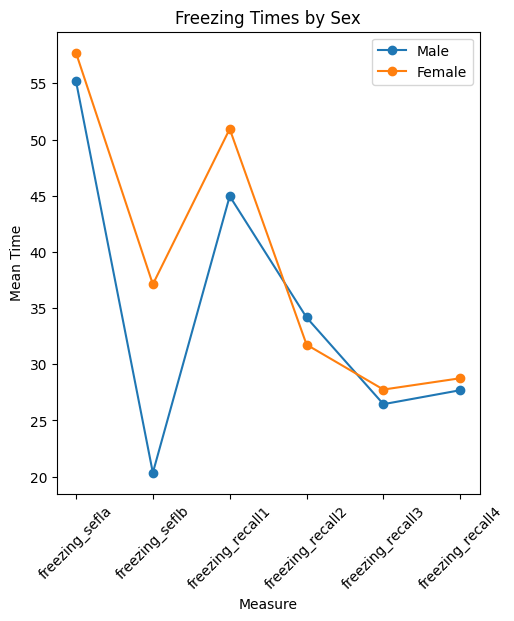

In [96]:
df = test_1_sefl.copy()
# Recalculating with inclusion of freezing sefla and freezing seflb
# For both sex and age groups
# Adding to the original calculation for comparison

# Recalculate means for sex categories
male_means = df[df['sex'] == 1][['freezing_sefla', 'freezing_seflb', 'freezing_recall1', 'freezing_recall2', 'freezing_recall3', 'freezing_recall4']].mean()
female_means = df[df['sex'] == 0][['freezing_sefla', 'freezing_seflb', 'freezing_recall1', 'freezing_recall2', 'freezing_recall3', 'freezing_recall4']].mean()

# Plotting
plt.figure(figsize=(12, 6))

# Sex
plt.subplot(1, 2, 2)
plt.plot(male_means.index, male_means.values, label='Male', marker='o')
plt.plot(female_means.index, female_means.values, label='Female', marker='o')
plt.title('Freezing Times by Sex')
plt.xlabel('Measure')
plt.ylabel('Mean Time')
plt.xticks(rotation=45)
plt.legend()

In [106]:
df

,cohort_id,freezing_sefla,freezing_seflb,date_seflb,freezing_recall1,date_recall1,freezing_recall2,date_recall2,freezing_recall3,date_recall3,freezing_recall4,date_recall4,freezing_recall5,date_recall5,sex,age_selfa
4,ptsd2_84,50.64,10.14,1,25.39,2,27.24,5,11.23,7,5.62,21.0,17.64,35.0,1,0
5,ptsd2_93,39.63,8.63,1,24.05,2,15.98,5,17.30,7,7.40,21.0,8.82,35.0,1,0
6,ptsd2_94,47.82,18.26,1,38.23,2,19.08,5,6.23,7,11.68,21.0,0.44,35.0,1,0
7,ptsd2_85,31.65,18.38,1,31.89,2,18.97,5,9.61,7,13.41,21.0,2.41,35.0,1,0
8,ptsd2_95,48.94,15.39,1,49.51,2,26.60,5,21.40,7,22.80,21.0,4.19,35.0,1,0
9,ptsd2_83,54.36,16.90,1,38.53,2,27.71,5,12.03,7,25.84,21.0,8.38,35.0,1,0
14,ptsd3_10,4.45,9.56,1,54.05,2,25.32,5,26.56,7,30.26,16.0,42.19,36.0,1,1
15,ptsd3_12,4.44,0.78,1,36.05,2,24.83,5,15.93,7,9.35,16.0,24.12,36.0,1,1
16,ptsd3_1,61.92,36.73,1,55.02,2,46.33,5,34.20,7,47.53,16.0,30.30,36.0,1,1
17,ptsd3_3,62.95,28.85,1,31.64,2,0.00,5,19.17,7,34.16,16.0,42.09,36.0,1,1


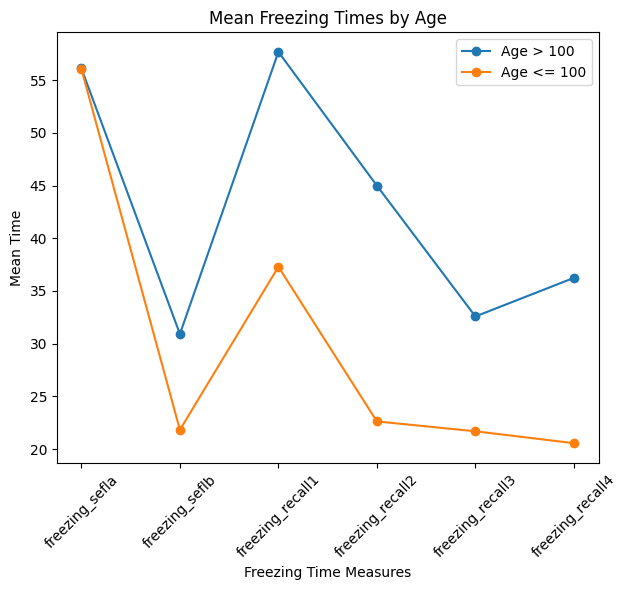

In [108]:
# Calculating mean freezing times for age above 100 and below or equal to 100
age_above_100_means = df[df['age_selfa']==1][['freezing_sefla', 'freezing_seflb', 'freezing_recall1', 'freezing_recall2', 'freezing_recall3', 'freezing_recall4']].mean()
age_below_100_means = df[df['age_selfa']==0][['freezing_sefla', 'freezing_seflb', 'freezing_recall1', 'freezing_recall2', 'freezing_recall3', 'freezing_recall4']].mean()
# Plotting
plt.figure(figsize=(12, 6))
# Plot for age
plt.subplot(1, 2, 2)
plt.plot(age_above_100_means, label='Age > 100', marker='o')
plt.plot(age_below_100_means, label='Age <= 100', marker='o')
plt.title('Mean Freezing Times by Age')
plt.xlabel('Freezing Time Measures')
plt.ylabel('Mean Time')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Training without Learning curve

In [118]:
test_1_sefl = test_1_sefl.drop(columns = ['freezing_recall5','date_recall5'])

In [119]:
from sklearn.model_selection import train_test_split
X = test_1_sefl.drop(columns = ['cohort_id','date_recall1','freezing_recall4'])
y = test_1_sefl['freezing_recall4']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
import random
random.seed(12)

In [121]:
import statsmodels.api as sm

# Adding a constant to the X_train and X_test for the intercept term
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Creating the model
ols_model = sm.OLS(y_train, X_train_sm)

# Fitting the model
ols_results = ols_model.fit()

# Calculate MSE for training data
y_train_pred = ols_results.predict(X_train_sm)
mse_train = sm.tools.eval_measures.mse(y_train, y_train_pred)

# Calculate MSE for test data
y_test_pred = ols_results.predict(X_test_sm)
mse_test = sm.tools.eval_measures.mse(y_test, y_test_pred)

# Getting a summary of the model
ols_summary = ols_results.summary()
ols_summary, mse_train, mse_test

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:       freezing_recall4   R-squared:                       0.404
 Model:                            OLS   Adj. R-squared:                  0.166
 Method:                 Least Squares   F-statistic:                     1.697
 Date:                Tue, 27 Feb 2024   Prob (F-statistic):              0.137
 Time:                        18:03:35   Log-Likelihood:                -134.64
 No. Observations:                  36   AIC:                             291.3
 Df Residuals:                      25   BIC:                             308.7
 Df Model:                          10                                         
 Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------

In [122]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import numpy as np

# Fit OLS model
ols_model = OLS(y_train, sm.add_constant(X_train)).fit()

# Get OLS predictions for the test set
y_pred_ols = ols_model.predict(sm.add_constant(X_test))

# Get standard errors of predictions
pred_stderr = ols_model.get_prediction(sm.add_constant(X_test)).se_obs

# Calculate the 95% confidence interval for the predictions
ci_lower = y_pred_ols - 1.96 * pred_stderr
ci_upper = y_pred_ols + 1.96 * pred_stderr

# Checking how many of the actual test values fall within the 95% confidence interval
inside_ci = np.sum((y_test >= ci_lower) & (y_test <= ci_upper))
percentage_inside_ci = (inside_ci / len(y_test)) * 100

percentage_inside_ci

100.0

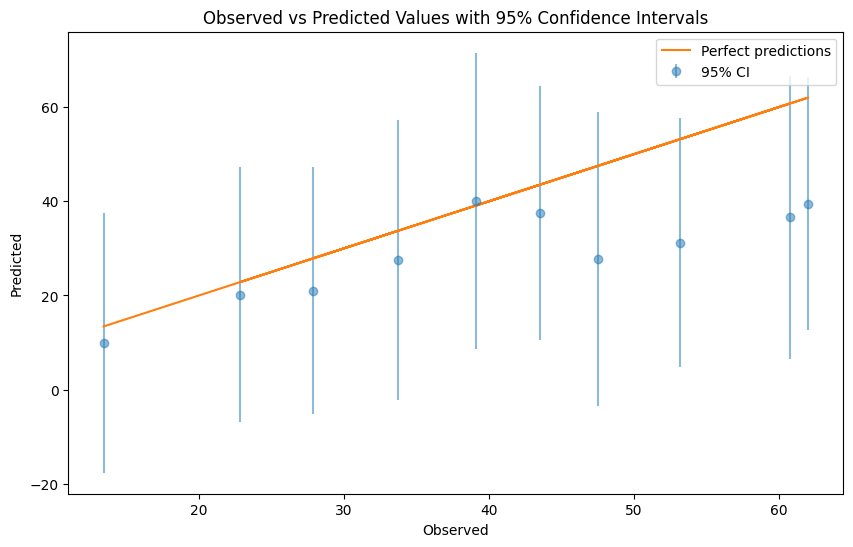

In [123]:
# Visualize the outcomes
plt.figure(figsize=(10, 6))

# Plot the observed vs predicted values with confidence intervals
plt.errorbar(y_test, y_pred_ols, yerr=1.96*pred_stderr, fmt='o', alpha=0.5, label='95% CI')

# Plot a line for perfect predictions
plt.plot(y_test, y_test, label='Perfect predictions')

# Labelling
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted Values with 95% Confidence Intervals')
plt.legend()

plt.show()

In [124]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}


model_mse = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)
    mean_score = -np.mean(scores)
    model_mse[model_name] = mean_score

model_mse

{'Decision Tree Regressor': 276.4634855555556,
 'Random Forest Regressor': 165.81268043717793,
 'Gradient Boosting Regressor': 214.22324093225035}

In [125]:
model_importances = {}
mse_details = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        features_importance = dict(zip(X.columns, importances))
        sorted_importances = sorted(features_importance.items(), key=lambda x: x[1], reverse=True)
        model_importances[model_name] = sorted_importances
    else:
        model_importances[model_name] = "This model doesn't support feature importance."

    mse_details[model_name] = {"Train MSE": train_mse, "Test MSE": test_mse}

for model_name, importances in model_importances.items():
    mse_info = mse_details[model_name]
    print(f"{model_name} MSE:")
    print(f"Train MSE: {mse_info['Train MSE']}")
    print(f"Test MSE: {mse_info['Test MSE']}\n")
    print(f"{model_name} feature importances:")
    for feature, importance in importances:
        print(f"{feature}: {importance}")
    print("\n")

Decision Tree Regressor MSE:
Train MSE: 0.0
Test MSE: 259.8003900000001

Decision Tree Regressor feature importances:
freezing_recall1: 0.3747173759685612
freezing_sefla: 0.1928243761902435
freezing_recall3: 0.15901516816599373
date_recall4: 0.09630962607324402
freezing_recall2: 0.0953914540044388
freezing_seflb: 0.08064384711826984
date_recall2: 0.0009221649373883236
sex: 0.00017598754186037448
date_seflb: 0.0
date_recall3: 0.0
age_selfa: 0.0


Random Forest Regressor MSE:
Train MSE: 24.709953589999966
Test MSE: 245.88073076000023

Random Forest Regressor feature importances:
freezing_sefla: 0.26435240903510193
freezing_recall3: 0.2416992189847156
freezing_recall1: 0.22664643953816407
freezing_recall2: 0.11088113533352299
freezing_seflb: 0.07838249632864881
date_recall4: 0.03922499769373901
age_selfa: 0.017706716390622046
sex: 0.009785089321276015
date_recall2: 0.006904307121138629
date_recall3: 0.004417190253070993
date_seflb: 0.0


Gradient Boosting Regressor MSE:
Train MSE: 0.07270

In [126]:
# Training the RandomForestRegressor with the actual dataset provided by the user
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting the target variable for the test set using the random forest
y_pred_rf = rf.predict(X_test)

# Initialize the list to store prediction intervals
y_pred_intervals_rf = []

# Calculate the prediction interval for each test example
for i in range(len(X_test)):
    # Get the predictions from each tree
    predictions = [tree.predict(X_test.iloc[i].values.reshape(1, -1)) for tree in rf.estimators_]

    # Calculate the 2.5th and 97.5th percentiles for the predictions
    lower_bound = np.percentile(predictions, 2.5)
    upper_bound = np.percentile(predictions, 97.5)
    y_pred_intervals_rf.append((lower_bound, upper_bound))

# Convert prediction intervals to a numpy array for easier manipulation
y_pred_intervals_rf = np.array(y_pred_intervals_rf)

# Calculate the percentage of test set targets that fall within the prediction intervals
within_interval = np.sum((y_test >= y_pred_intervals_rf[:, 0]) & (y_test <= y_pred_intervals_rf[:, 1]))
interval_coverage = within_interval / len(y_test) * 100

interval_coverage

70.0

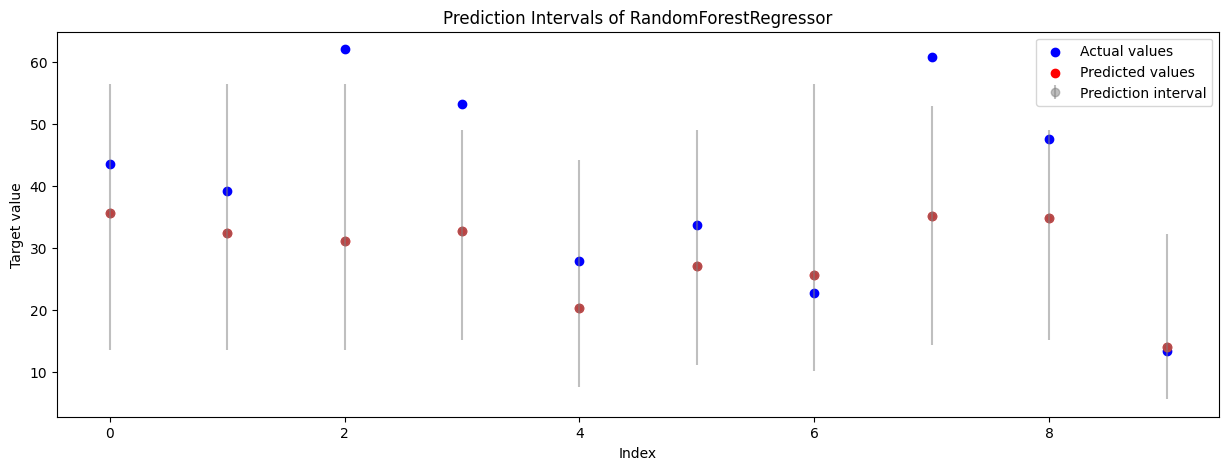

In [127]:
# Plot the predicted values and the prediction intervals
plt.figure(figsize=(15, 5))

# Index for x-axis
index = np.arange(len(y_test))

# Plotting the actual values
plt.scatter(index, y_test, color='blue', label='Actual values')

# Plotting the predicted values
plt.scatter(index, y_pred_rf, color='red', label='Predicted values')

# Plotting the prediction intervals
plt.errorbar(index, y_pred_rf, yerr=[y_pred_rf - y_pred_intervals_rf[:, 0], y_pred_intervals_rf[:, 1] - y_pred_rf],
             fmt='o', color='gray', alpha=0.5, label='Prediction interval')

plt.title('Prediction Intervals of RandomForestRegressor')
plt.xlabel('Index')
plt.ylabel('Target value')
plt.legend()

## Failed Deep learning

In [128]:
pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [129]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the model
def build_model():
    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Wrap the model using the function you created
estimator = KerasRegressor(build_fn=build_model, epochs=100, batch_size=5, verbose=0)

# Fit the model
estimator.fit(X_train, y_train)

# Predict
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

mse_train, mse_test

<ipython-input-129-22a9e1018ce7>:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=build_model, epochs=100, batch_size=5, verbose=0)


(96.67571700660159, 358.6982505679318)

# Training with learning curve(mean)


## Learning curve wrangling

In [130]:
df_lc = pd.read_csv('/content/drive/MyDrive/PTSD /stim_interval_freezing.csv')
df_lc = df_lc.dropna(axis=0)
df_lc

,Cohort,Group,ELS,Sex,genotype,id,Pre,Shock01,Shock02,Shock03,Shock04,Shock05,Shock06,Shock07,Shock08,Shock09,Shock10
0,els1,Control,ELS,Male,wt,922-1,11.80,28.41,12.37,55.32,8.09,9.15,1.31,3.06,48.64,98.73,95.07
1,els1,Control,ELS,Male,wt,922-2,0.00,0.00,0.18,0.00,1.40,1.08,1.89,5.81,0.63,7.70,53.19
2,els1,Control,ELS,Male,wt,922-3,1.74,7.13,4.80,9.60,2.98,12.81,16.06,51.48,14.86,31.41,34.18
3,els1,Control,ELS,Male,wt,922-4,0.27,0.74,0.00,0.15,0.00,0.00,0.26,0.00,0.19,0.30,1.08
4,els1,Control,ELS,Male,wt,922-5,0.00,0.00,0.98,1.27,0.00,2.80,0.26,3.47,1.14,2.09,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,ptsd9,Control,no ELS,Male,wt,31-5,1.73,2.77,2.58,3.30,3.07,6.03,8.68,5.61,9.23,5.83,4.45
125,ptsd9,SEFL,no ELS,Male,wt,29-5,4.56,21.46,49.29,62.44,56.28,44.46,61.42,54.84,58.63,61.63,61.54
126,ptsd9,SEFL,no ELS,Male,wt,30-1,5.83,31.24,49.82,68.97,76.00,81.38,93.67,72.58,75.08,87.43,91.59
127,ptsd9,SEFL,no ELS,Male,wt,31-1,0.82,37.70,52.14,80.43,68.74,88.27,81.85,88.99,63.57,83.40,81.85


In [131]:
df_lc['cohort_id'] = df_lc['Cohort'] + '_' + df_lc['id']

# Calculate the mean of Shock01 to Shock10 for each row
shock_columns = [f'Shock0{i}' if i < 10 else f'Shock{i}' for i in range(1, 11)]
df_lc['mean_shock'] = df_lc[shock_columns].mean(axis=1)

# Display the first few rows of the updated dataframe to verify the changes
df_mean_lc = df_lc[['cohort_id', 'mean_shock']]

In [132]:
test_mean_lc = test_1_sefl.merge(df_mean_lc, on='cohort_id', how='inner')
test_mean_lc

,cohort_id,freezing_sefla,freezing_seflb,date_seflb,freezing_recall1,date_recall1,freezing_recall2,date_recall2,freezing_recall3,date_recall3,freezing_recall4,date_recall4,sex,age_selfa,mean_shock
0,ptsd2_84,50.64,10.14,1,25.39,2,27.24,5,11.23,7,5.62,21.0,1,0,57.162
1,ptsd2_93,39.63,8.63,1,24.05,2,15.98,5,17.30,7,7.40,21.0,1,0,44.955
2,ptsd2_94,47.82,18.26,1,38.23,2,19.08,5,6.23,7,11.68,21.0,1,0,53.342
3,ptsd2_85,31.65,18.38,1,31.89,2,18.97,5,9.61,7,13.41,21.0,1,0,34.811
4,ptsd2_95,48.94,15.39,1,49.51,2,26.60,5,21.40,7,22.80,21.0,1,0,51.815
5,ptsd2_83,54.36,16.90,1,38.53,2,27.71,5,12.03,7,25.84,21.0,1,0,60.647
6,ptsd3_12,4.44,0.78,1,36.05,2,24.83,5,15.93,7,9.35,16.0,1,1,5.073
7,ptsd3_1,61.92,36.73,1,55.02,2,46.33,5,34.20,7,47.53,16.0,1,1,65.394
8,ptsd3_3,62.95,28.85,1,31.64,2,0.00,5,19.17,7,34.16,16.0,1,1,68.046
9,ptsd3_5,54.36,23.82,1,81.37,2,45.62,5,14.62,7,18.61,16.0,1,1,59.522


## training

In [133]:
X = test_mean_lc.drop(columns = ['cohort_id','date_recall1','freezing_recall4'])
y = test_mean_lc['freezing_recall4']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
# Adding a constant to the X_train and X_test for the intercept term
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Creating the model
ols_model = sm.OLS(y_train, X_train_sm)

# Fitting the model
ols_results = ols_model.fit()

# Calculate MSE for training data
y_train_pred = ols_results.predict(X_train_sm)
mse_train = sm.tools.eval_measures.mse(y_train, y_train_pred)

# Calculate MSE for test data
y_test_pred = ols_results.predict(X_test_sm)
mse_test = sm.tools.eval_measures.mse(y_test, y_test_pred)

# Getting a summary of the model
ols_summary = ols_results.summary()
ols_summary, mse_train, mse_test

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:       freezing_recall4   R-squared:                       0.605
 Model:                            OLS   Adj. R-squared:                  0.424
 Method:                 Least Squares   F-statistic:                     3.342
 Date:                Tue, 27 Feb 2024   Prob (F-statistic):            0.00650
 Time:                        18:04:48   Log-Likelihood:                -128.05
 No. Observations:                  36   AIC:                             280.1
 Df Residuals:                      24   BIC:                             299.1
 Df Model:                          11                                         
 Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------

In [135]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import numpy as np

# Fit OLS model
ols_model = OLS(y_train, sm.add_constant(X_train)).fit()

# Get OLS predictions for the test set
y_pred_ols = ols_model.predict(sm.add_constant(X_test))

# Get standard errors of predictions
pred_stderr = ols_model.get_prediction(sm.add_constant(X_test)).se_obs

# Calculate the 95% confidence interval for the predictions
ci_lower = y_pred_ols - 1.96 * pred_stderr
ci_upper = y_pred_ols + 1.96 * pred_stderr

# Checking how many of the actual test values fall within the 95% confidence interval
inside_ci = np.sum((y_test >= ci_lower) & (y_test <= ci_upper))
percentage_inside_ci = (inside_ci / len(y_test)) * 100

percentage_inside_ci

55.55555555555556

In [136]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}


model_mse = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)
    mean_score = -np.mean(scores)
    model_mse[model_name] = mean_score

model_mse

{'Decision Tree Regressor': 292.7113311111111,
 'Random Forest Regressor': 182.24372820244463,
 'Gradient Boosting Regressor': 213.06875558950637}

In [137]:
model_importances = {}
mse_details = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        features_importance = dict(zip(X.columns, importances))
        sorted_importances = sorted(features_importance.items(), key=lambda x: x[1], reverse=True)
        model_importances[model_name] = sorted_importances
    else:
        model_importances[model_name] = "This model doesn't support feature importance."

    mse_details[model_name] = {"Train MSE": train_mse, "Test MSE": test_mse}

for model_name, importances in model_importances.items():
    mse_info = mse_details[model_name]
    print(f"{model_name} MSE:")
    print(f"Train MSE: {mse_info['Train MSE']}")
    print(f"Test MSE: {mse_info['Test MSE']}\n")
    print(f"{model_name} feature importances:")
    for feature, importance in importances:
        print(f"{feature}: {importance}")
    print("\n")

Decision Tree Regressor MSE:
Train MSE: 0.0
Test MSE: 351.9048777777778

Decision Tree Regressor feature importances:
freezing_recall3: 0.6948423220879442
date_recall3: 0.12568363023257276
freezing_sefla: 0.059716638805700856
freezing_seflb: 0.04140069349157338
freezing_recall1: 0.032136250461064865
freezing_recall2: 0.02225512751642541
mean_shock: 0.02155968905952447
date_recall4: 0.0024056483451941526
date_seflb: 0.0
date_recall2: 0.0
sex: 0.0
age_selfa: 0.0


Random Forest Regressor MSE:
Train MSE: 20.887855842499896
Test MSE: 385.6275895944443

Random Forest Regressor feature importances:
freezing_recall3: 0.41263009452505717
freezing_sefla: 0.13808215530566617
freezing_seflb: 0.11241061731467178
freezing_recall1: 0.09125568032605243
mean_shock: 0.08689395692414784
freezing_recall2: 0.08189963928631427
date_recall4: 0.02861691361031756
date_recall3: 0.022571949434300277
date_recall2: 0.021251164023769906
sex: 0.002496735552479385
age_selfa: 0.0018910936972230852
date_seflb: 0.0


G

In [138]:
# Training the RandomForestRegressor with the actual dataset provided by the user
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting the target variable for the test set using the random forest
y_pred_rf = rf.predict(X_test)

# Initialize the list to store prediction intervals
y_pred_intervals_rf = []

# Calculate the prediction interval for each test example
for i in range(len(X_test)):
    # Get the predictions from each tree
    predictions = [tree.predict(X_test.iloc[i].values.reshape(1, -1)) for tree in rf.estimators_]

    # Calculate the 2.5th and 97.5th percentiles for the predictions
    lower_bound = np.percentile(predictions, 2.5)
    upper_bound = np.percentile(predictions, 97.5)
    y_pred_intervals_rf.append((lower_bound, upper_bound))

# Convert prediction intervals to a numpy array for easier manipulation
y_pred_intervals_rf = np.array(y_pred_intervals_rf)

# Calculate the percentage of test set targets that fall within the prediction intervals
within_interval = np.sum((y_test >= y_pred_intervals_rf[:, 0]) & (y_test <= y_pred_intervals_rf[:, 1]))
interval_coverage = within_interval / len(y_test) * 100

interval_coverage

66.66666666666666

#Training with learning curve, every columns of it

In [139]:
df_all_lc = df_lc[['cohort_id']+shock_columns]
test_all_lc = test_1_sefl.merge(df_all_lc, on='cohort_id', how='inner')

In [140]:
test_all_lc

,cohort_id,freezing_sefla,freezing_seflb,date_seflb,freezing_recall1,date_recall1,freezing_recall2,date_recall2,freezing_recall3,date_recall3,...,Shock01,Shock02,Shock03,Shock04,Shock05,Shock06,Shock07,Shock08,Shock09,Shock10
0,ptsd2_84,50.64,10.14,1,25.39,2,27.24,5,11.23,7,...,7.50,17.70,44.83,41.95,48.98,57.18,96.43,90.32,80.33,86.40
1,ptsd2_93,39.63,8.63,1,24.05,2,15.98,5,17.30,7,...,10.64,6.76,18.59,34.05,45.86,67.49,79.92,51.17,56.25,78.82
2,ptsd2_94,47.82,18.26,1,38.23,2,19.08,5,6.23,7,...,5.54,19.04,26.01,39.44,50.16,77.74,77.57,67.24,90.05,80.63
3,ptsd2_85,31.65,18.38,1,31.89,2,18.97,5,9.61,7,...,9.10,25.09,29.35,30.20,38.21,50.98,27.42,47.56,60.36,29.84
4,ptsd2_95,48.94,15.39,1,49.51,2,26.60,5,21.40,7,...,13.84,39.68,46.59,41.82,63.08,78.50,27.01,86.97,77.34,43.32
5,ptsd2_83,54.36,16.90,1,38.53,2,27.71,5,12.03,7,...,7.56,31.58,59.92,57.62,77.61,67.25,73.50,83.11,74.79,73.53
6,ptsd3_12,4.44,0.78,1,36.05,2,24.83,5,15.93,7,...,2.71,0.71,3.00,7.16,6.14,1.11,3.98,4.62,12.64,8.66
7,ptsd3_1,61.92,36.73,1,55.02,2,46.33,5,34.20,7,...,37.33,57.65,72.94,53.40,62.43,88.45,86.02,80.33,73.15,42.24
8,ptsd3_3,62.95,28.85,1,31.64,2,0.00,5,19.17,7,...,17.65,45.28,63.12,52.37,59.42,82.83,83.27,91.14,92.00,93.38
9,ptsd3_5,54.36,23.82,1,81.37,2,45.62,5,14.62,7,...,11.01,33.54,48.43,47.26,66.85,83.09,58.16,82.67,81.90,82.31


In [141]:
X = test_all_lc.drop(columns = ['cohort_id','date_recall1','freezing_recall4'])
y = test_all_lc['freezing_recall4']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
# Adding a constant to the X_train and X_test for the intercept term
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Creating the model
ols_model = sm.OLS(y_train, X_train_sm)

# Fitting the model
ols_results = ols_model.fit()

# Calculate MSE for training data
y_train_pred = ols_results.predict(X_train_sm)
mse_train = sm.tools.eval_measures.mse(y_train, y_train_pred)

# Calculate MSE for test data
y_test_pred = ols_results.predict(X_test_sm)
mse_test = sm.tools.eval_measures.mse(y_test, y_test_pred)

# Getting a summary of the model
ols_summary = ols_results.summary()
ols_summary, mse_train, mse_test

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:       freezing_recall4   R-squared:                       0.836
 Model:                            OLS   Adj. R-squared:                  0.617
 Method:                 Least Squares   F-statistic:                     3.819
 Date:                Tue, 27 Feb 2024   Prob (F-statistic):            0.00543
 Time:                        18:05:11   Log-Likelihood:                -112.25
 No. Observations:                  36   AIC:                             266.5
 Df Residuals:                      15   BIC:                             299.7
 Df Model:                          20                                         
 Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------

In [143]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import numpy as np

# Fit OLS model
ols_model = OLS(y_train, sm.add_constant(X_train)).fit()

# Get OLS predictions for the test set
y_pred_ols = ols_model.predict(sm.add_constant(X_test))

# Get standard errors of predictions
pred_stderr = ols_model.get_prediction(sm.add_constant(X_test)).se_obs

# Calculate the 95% confidence interval for the predictions
ci_lower = y_pred_ols - 1.96 * pred_stderr
ci_upper = y_pred_ols + 1.96 * pred_stderr

# Checking how many of the actual test values fall within the 95% confidence interval
inside_ci = np.sum((y_test >= ci_lower) & (y_test <= ci_upper))
percentage_inside_ci = (inside_ci / len(y_test)) * 100

percentage_inside_ci

66.66666666666666

In [144]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}


model_mse = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)
    mean_score = -np.mean(scores)
    model_mse[model_name] = mean_score

model_mse

{'Decision Tree Regressor': 278.1104,
 'Random Forest Regressor': 159.69573645111103,
 'Gradient Boosting Regressor': 218.3692222980243}

In [145]:
model_importances = {}
mse_details = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        features_importance = dict(zip(X.columns, importances))
        sorted_importances = sorted(features_importance.items(), key=lambda x: x[1], reverse=True)
        model_importances[model_name] = sorted_importances
    else:
        model_importances[model_name] = "This model doesn't support feature importance."

    mse_details[model_name] = {"Train MSE": train_mse, "Test MSE": test_mse}

for model_name, importances in model_importances.items():
    mse_info = mse_details[model_name]
    print(f"{model_name} MSE:")
    print(f"Train MSE: {mse_info['Train MSE']}")
    print(f"Test MSE: {mse_info['Test MSE']}\n")
    print(f"{model_name} feature importances:")
    for feature, importance in importances:
        print(f"{feature}: {importance}")
    print("\n")

Decision Tree Regressor MSE:
Train MSE: 0.0
Test MSE: 418.0101444444444

Decision Tree Regressor feature importances:
freezing_recall3: 0.4456923028563457
Shock02: 0.18906380507245377
Shock04: 0.1371160946538167
Shock07: 0.0621095719342709
freezing_recall1: 0.03310666070747652
date_recall2: 0.029465033072366448
freezing_seflb: 0.027300280122958948
Shock05: 0.02342446637622984
freezing_recall2: 0.0179446188079268
Shock08: 0.014003353446114832
date_recall4: 0.005704090899372587
Shock01: 0.0056186036825689985
Shock03: 0.0035862551923411252
Shock09: 0.0029731169777622193
Shock10: 0.001882957399946818
freezing_sefla: 0.00066930471103396
Shock06: 0.00024152813160619108
sex: 9.795595540768524e-05
date_seflb: 0.0
date_recall3: 0.0
age_selfa: 0.0


Random Forest Regressor MSE:
Train MSE: 19.34209748888878
Test MSE: 369.6371013088886

Random Forest Regressor feature importances:
freezing_recall3: 0.33078217169796503
Shock02: 0.10784815559542096
Shock03: 0.09159435483406213
Shock01: 0.06058891179

In [146]:
# Training the RandomForestRegressor with the actual dataset provided by the user
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting the target variable for the test set using the random forest
y_pred_rf = rf.predict(X_test)

# Initialize the list to store prediction intervals
y_pred_intervals_rf = []

# Calculate the prediction interval for each test example
for i in range(len(X_test)):
    # Get the predictions from each tree
    predictions = [tree.predict(X_test.iloc[i].values.reshape(1, -1)) for tree in rf.estimators_]

    # Calculate the 2.5th and 97.5th percentiles for the predictions
    lower_bound = np.percentile(predictions, 2.5)
    upper_bound = np.percentile(predictions, 97.5)
    y_pred_intervals_rf.append((lower_bound, upper_bound))

# Convert prediction intervals to a numpy array for easier manipulation
y_pred_intervals_rf = np.array(y_pred_intervals_rf)

# Calculate the percentage of test set targets that fall within the prediction intervals
within_interval = np.sum((y_test >= y_pred_intervals_rf[:, 0]) & (y_test <= y_pred_intervals_rf[:, 1]))
interval_coverage = within_interval / len(y_test) * 100

interval_coverage

77.77777777777779